<a href="https://colab.research.google.com/github/CoProjOfUnemployeds/TIL-of-Unemployeds/blob/main/210816_JH_Iris_Regression_Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

전처리 단계

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/colab/딥 러닝을 이용한 자연어처리 입문/Iris.csv', encoding = 'latin1')

In [ ]:
data.head(5)
print(data.shape)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("품종 종류: ", data['Species'].unique(), sep = '\n')

품종 종류: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
import seaborn as sns
#data = data.drop(columns = 'Id')

sns.set(style = 'whitegrid', color_codes = True)
g = sns.pairplot(data, hue="Species", palette="husl")

In [ ]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)

In [ ]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind = 'bar')

50개씩 1:1:1의 분포를 보여주고, 특성과 품종을 각각 종속변수와 독립변수 데이터로 분리하는 작업을 수행한다.

In [ ]:
data['Species'] = data['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':0})
data['Species'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
#X데이터, 총 4개를 가짐
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
#예측해야 하는 값
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


훈련 데이터 / 테스트 데이터의 분리와 원-핫 인코딩 수행

In [ ]:
# 훈련 데이터: 테스트 데이터 8:2로 나눈다. 데이터의 순서를 섞는다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size = 0.8, random_state = 1)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

Softmax Regression

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim = 4, activation ='softmax'))
sgd = optimizers.SGD(lr = 0.01)
#손실함수로는 categorical_crossentropy, 옵티마이저로는 경사하강법 일종의 adam을 사용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 1,  epochs = 200, validation_data=(X_test, y_test))

# Epoch 200/200
# 120/120 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9667 - val_loss: 0.2012 - val_accuracy: 0.9667

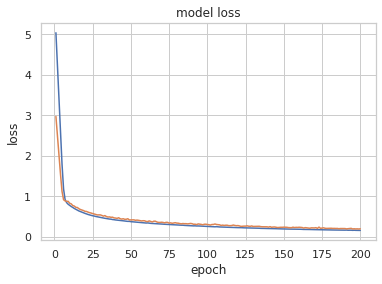

In [ ]:
#각 에포크당 훈련, 테스트 데이터에 대한 정확도를 그래프로 나타낸것
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
print("\n 테스트 정확도: %.4f" %(model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 19ms/step - loss: 0.2012 - accuracy: 0.9667

 테스트 정확도: 0.9667
